<a href="https://colab.research.google.com/github/Umer-Farooq-Goku/Artificial-Intelligence/blob/main/Multi_Digit_Recogtion_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing All The Requried Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import cv2 #Open CV, a computer vision library
from google.colab.patches import cv2_imshow
#from keras.datasets import mnist
import matplotlib.pyplot as plt

Fetching The MNIST Dataset and Spliting into X_train, Y_train and X_test, Y_test

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Displaying The 1st Figure in X_Train and Its Corresponding Label in Y_Train

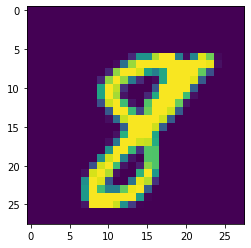

8


In [3]:
plt.imshow(X_train[55])
plt.show()
print (Y_train[55])

Printing The Shapes of Train and Test Variables

In [4]:
print('----------------------------------')
print('Shapes of Train Data')
print('----------------------------------')
print ("X_train: ",X_train.shape)
print ("Y_train:",Y_train.shape)
print('----------------------------------')
print('Test Data')
print('----------------------------------')
print ("X_test:",X_test.shape)
print ("Y_test:",Y_test.shape)

----------------------------------
Shapes of Train Data
----------------------------------
X_train:  (60000, 28, 28)
Y_train: (60000,)
----------------------------------
Test Data
----------------------------------
X_test: (10000, 28, 28)
Y_test: (10000,)


Need to Covert This Data to GreyScale Image By Reshaping.


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Grey Scale Format

In [6]:
print('----------------------------------')
print('Shapes of Train Data')
print('----------------------------------')
print ("X_train: ",X_train.shape)
print ("Y_train:",Y_train.shape)
print('----------------------------------')
print('Test Data')
print('----------------------------------')
print ("X_test:",X_test.shape)
print ("Y_test:",Y_test.shape)

----------------------------------
Shapes of Train Data
----------------------------------
X_train:  (60000, 28, 28, 1)
Y_train: (60000,)
----------------------------------
Test Data
----------------------------------
X_test: (10000, 28, 28, 1)
Y_test: (10000,)


Changing Data to Categorical Data

In [7]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

Convolution Neural Network Model

In [8]:
model = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Flatten(), 
     tf.keras.layers.Dense(10, activation='softmax'),              
])


Compiling The CNN. Using Adam Optimizer and Binary Cross Entropy

In [9]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )

Training The Model

In [10]:
model.fit(
    X_train, 
    Y_train, 
    validation_data=(X_test, Y_test), 
    epochs=5)


Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 1.0959 - accuracy: 0.8695 - val_loss: 0.0932 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9792 - val_loss: 0.0661 - val_accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9857 - val_loss: 0.0697 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0746 - val_accuracy: 0.9802


Testing on Single Image at Index 55 from Test

In [11]:
predictedValue = model.predict(X_test[0].reshape(1, 28, 28, 1))

soft_max_output = np.zeros(predictedValue.shape)
soft_max_output[0][np.argmax(predictedValue)] = 1
print ("Soft Max Output:",soft_max_output)
## Third output
print ("Soft Max Prediction")
cv2_imshow(X_test[0].reshape(28, 28))

print("Final Output Digit:",np.argmax(predictedValue))

Soft Max Output: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Soft Max Prediction


Final Output Digit: 7


Detecting Contours in 5 Digit Image and Separating Them

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 2
Soft Max Output: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 5
Soft Max Output: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 0
Soft Max Output: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 8
Soft Max Output: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 2
Soft Max Output: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 5
Soft Max Output: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 9
Soft Max Output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
---------------------------------------

Resized Contour Shape: (18, 18)
Padded Contour Shape: (28, 28)


Final Output: 8
Soft Max Output: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
---------------------------------------



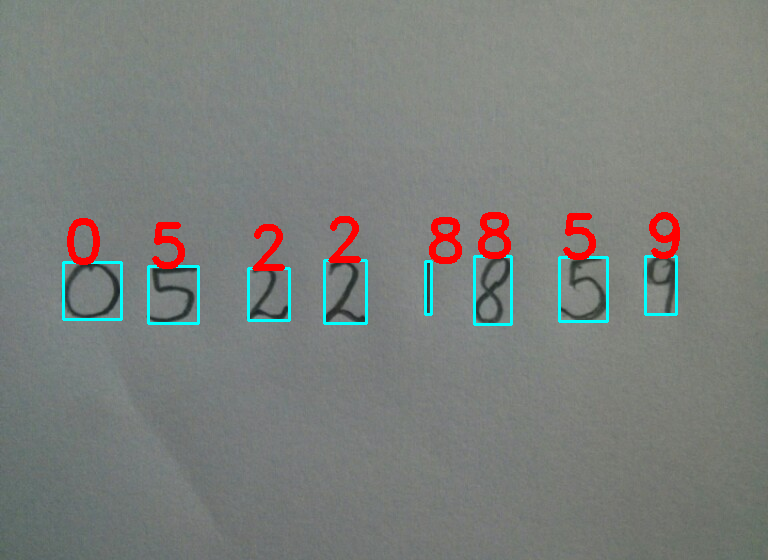

In [15]:
#Reading Multi-Digit Image
image = cv2.imread('/content/photo_1.jpg')

#Getting Grey Color Space
greyColorSpace = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

#Using Gaussian Blur to remove noise by convolving a kernal.
gaussianBlue = cv2.GaussianBlur(greyColorSpace, (5, 5), 0)

#Setting Black and Whites Pixels if pixel value is between range [90,255].
retVal, threshold = cv2.threshold(gaussianBlue, 90, 255, cv2.THRESH_BINARY_INV) #Binary Inverse for Black and White
  
# Finding Contours 
contours,hierarchy= cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

processedContours = []
for contour in contours:
    topLeft_X_Cordinate,topLeft_Y_Cordinate,width,height = cv2.boundingRect(contour) #Getting Boundaries of a Contour

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image,
                  (topLeft_X_Cordinate,topLeft_Y_Cordinate),
                  (topLeft_X_Cordinate+width,
                    topLeft_Y_Cordinate+height), 
                  color=(255, 255, 0), 
                  thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    singleContourDigit = threshold[
                   topLeft_Y_Cordinate:topLeft_Y_Cordinate + height, 
                   topLeft_X_Cordinate:topLeft_X_Cordinate + width]
    
    # Resizing that digit to (18, 18)
    resizedContour = cv2.resize(singleContourDigit,(18,18))
    resizedContour = cv2.dilate(resizedContour, (3,3))


    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    paddedContour = np.pad(resizedContour, (5,5), "constant", constant_values=0)
    #cv2_imshow(paddedContour)

    print('Resized Contour Shape:',resizedContour.shape)
    print('Padded Contour Shape:',paddedContour.shape)
    
    processedContours.append(paddedContour)

    digitContours = paddedContour
    cv2_imshow(digitContours.reshape(28, 28))
    result = model.predict(digitContours.reshape(1,28, 28, 1)) 

    predictedValue = np.argmax(result)
    print("Final Output:",predictedValue)
    soft_max_output = np.zeros(result.shape)
    soft_max_output[0][np.argmax(result)] = 1
    print ("Soft Max Output:",soft_max_output)
    print ("---------------------------------------\n")
    cv2.putText(image, str(int(predictedValue)), (topLeft_X_Cordinate,topLeft_Y_Cordinate),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)


cv2_imshow(image)